In [129]:
pip install seaborn

     |████████████████████████████████| 288 kB 15.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_csv = pd.read_csv("../input/data/train/train.csv")

In [3]:
df_csv.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


## 연령 분포
### 전체

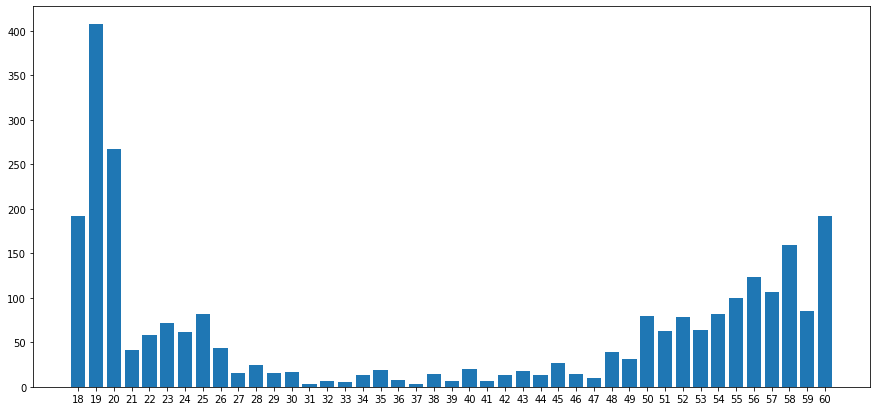

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
age_dist = df_csv.groupby('age')['age'].count()
axes.bar(age_dist.index,age_dist.values)
plt.xticks(np.arange(18,61), fontsize=10, rotation=0)
plt.show()

### 연령대별
    - age < 30
    - 30 <= age <60
    - 60 <= age (사실 60살 뿐)

In [18]:
under_30 = df_csv[df_csv['age']<30]
under_60 = df_csv[(df_csv['age']<60) & (30<=df_csv['age'])]
over_60 = df_csv[df_csv['age']>=60]

In [25]:
count_30_under = under_30['age'].count()
count_60_under = under_60['age'].count()
count_60_over = over_60['age'].count()


In [45]:
# values
print(count_30_under,count_60_under,count_60_over)

1281 1227 192


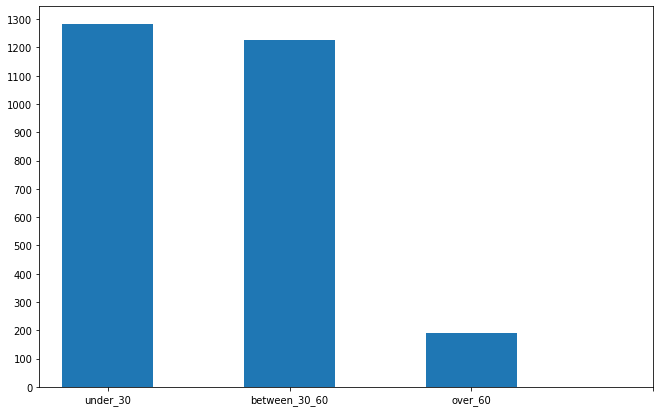

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(11, 7))
axes.bar(['under_30','between_30_60','over_60'],[count_30_under,count_60_under,count_60_over], width = 0.5)
plt.xticks(np.arange(0,4), fontsize=10, rotation=0)
plt.yticks(np.arange(0,1400,100))
plt.show()

### 성별 & 연령대 별

In [75]:
count_30_under_male = under_30['age'][under_30['gender']== 'male'].count()
count_60_under_male = under_60['age'][under_60['gender']== 'male'].count()
count_60_over_male = over_60['age'][over_60['gender']== 'male'].count()

count_30_under_female = under_30['age'][under_30['gender']== 'female'].count()
count_60_under_female = under_60['age'][under_60['gender']== 'female'].count()
count_60_over_female = over_60['age'][over_60['gender']== 'female'].count()

male = [count_30_under_male,count_60_under_male,count_60_over_male]
female = [count_30_under_female,count_60_under_female,count_60_over_female]
print('male: ',male,'\n','female: ',female)

male:  [549, 410, 83] 
 female:  [732, 817, 109]


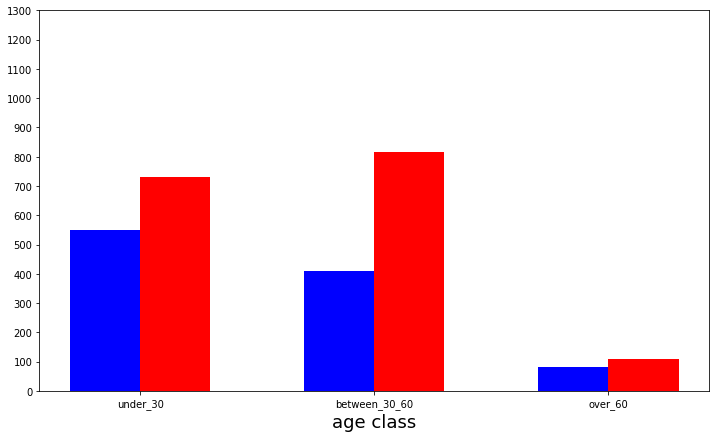

In [70]:
fig, axes = plt.subplots(1, 1, figsize=(12, 7))
index = np.arange(0,3)
bar_width = 0.3
label = ['under_30','between_30_60','over_60']
p1 = plt.bar(index, male, color='b', width = 0.3 )
p2 = plt.bar(index+bar_width,female,color='r',width = 0.3) 
plt.xlabel('age class', fontsize=18)
plt.xticks(index+0.15, label, fontsize=10, rotation=0)
plt.yticks(np.arange(0,1400,100))
plt.show()

### 성별

In [5]:
gender_age_dist = df_csv.groupby(['gender','age'])['age'].count()

In [279]:
df_g = pd.DataFrame(gender_age_dist)
female_age_dist = df_g.loc['female']['age']
male_age_dist = df_g.loc['male']['age']

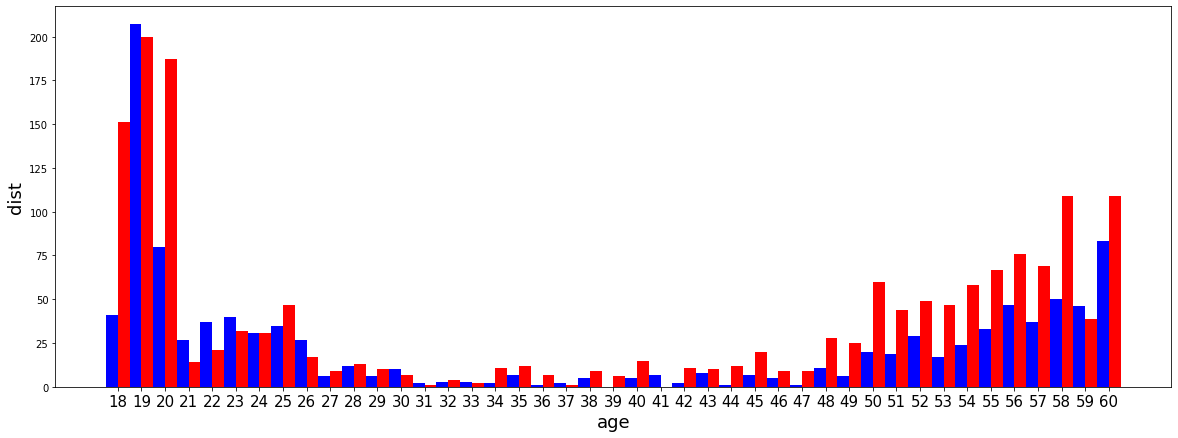

In [277]:
fig, axes = plt.subplots(1, 1, figsize=(20, 7))
index = list(np.arange(18,61))
p1 = plt.bar(male_age_dist.index,male_age_dist, color='b', width = 0.5)
p2 = plt.bar(female_age_dist.index+0.5, female_age_dist, color='r',width = 0.5) 
plt.ylabel('dist', fontsize=18)
plt.xlabel('age', fontsize=18)
plt.xticks(np.arange(18.25,61.25, step=1),np.arange(18,61), fontsize=15)
plt.show()

### 성비

In [123]:
gender[0]

gender
female    1658
male      1042
Name: age, dtype: int64

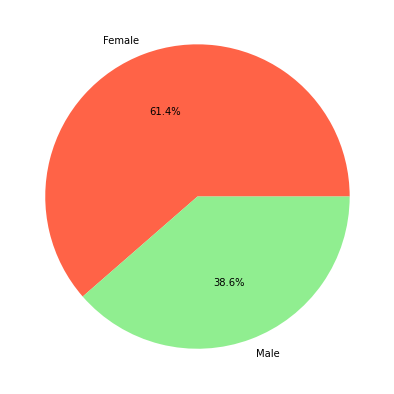

In [122]:
gender = [df_csv.groupby('gender')['age'].count()]

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pie(gender[0],
       ,labels=['Female','Male']
       ,colors = ['tomato','lightgreen']
       ,autopct='%1.1f%%'
      )
plt.show()

### Same size, No empty image
    - 1 incorrect mask, 5 masks, 1 with out mask _per person

In [28]:
# path list
path_list = df_csv['path']

In [40]:
images = [img_name for img_name in os.listdir("../input/data/train/images/000001_female_Asian_45") if not img_name.startswith(".")]

In [17]:
from PIL import Image

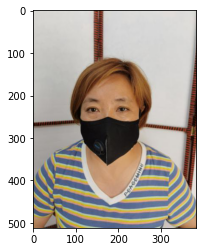

In [35]:
img_color = Image.open('../input/data/train/images/000001_female_Asian_45/mask1.jpg')
np_img_color = np.array(img_color)
plt.imshow(img_color)
plt.show()

In [43]:
img_color.size == (384, 512)

True

In [ ]:
# 0 = No None & Same size
# 1 = None exists & same size
# 2 = No None & diff sizes
# 3 = None exists & diff sizes
is_none_size = {}
for index, human in enumerate(path_list):
    per_img = {}
    code = 0
    image_names = [img_name for img_name in os.listdir(f"../input/data/train/images/{human}") if not img_name.startswith(".") ]
    for indice, names in enumerate(image_names):
        img_color = Image.open(f'../input/data/train/images/{human}/{names}')
        if img_color is None:
            code += 1
        if img_color.size != (384, 512):
            code += 2
        per_img[indice+1] = code
    is_none_size[index+1] = per_img
is_none_size

In [51]:
human_num = len(is_none_size)

In [73]:
valid = []
for i in is_none_size:
    values = list(is_none_size[i].values())
    boolin = (values == [0,0,0,0,0,0,0])
    valid.append(boolin)
all(valid)

True